<a href="https://colab.research.google.com/github/Sazim2019331087/voice_model/blob/main/audio_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install librosa numpy

In [ ]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
from glob import glob
import IPython.display as ipd
import matplotlib.pylab as plt

In [ ]:
audio_files = glob("/content/audio_source/*")
audio_files

['/content/audio_source/67163f6c06410.wav',
 '/content/audio_source/6716142f6db41.mp3',
 '/content/audio_source/67162c1abce90.wav']

In [ ]:
ipd.Audio(audio_files[0])

In [ ]:
y,sr = librosa.load(audio_files[0])
print(f"""
audio as numpy : {y}
audio shape : {y.shape}
sample rate : {sr}
""")

<ipython-input-9-6160f4467339>:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y,sr = librosa.load(audio_files[0])
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



audio as numpy : [ 1.0240439e-08  1.8811811e-08  1.6034228e-08 ... -6.6370162e-04
 -9.8335952e-04 -1.2823396e-03]
audio shape : (227556,)
sample rate : 22050



In [ ]:
pd.Series(y)

,0
0,1.024044e-08
1,1.881181e-08
2,1.603423e-08
3,6.173966e-09
4,3.284107e-09
...,...
227551,-2.713933e-04
227552,-4.020430e-04
227553,-6.637016e-04
227554,-9.833595e-04


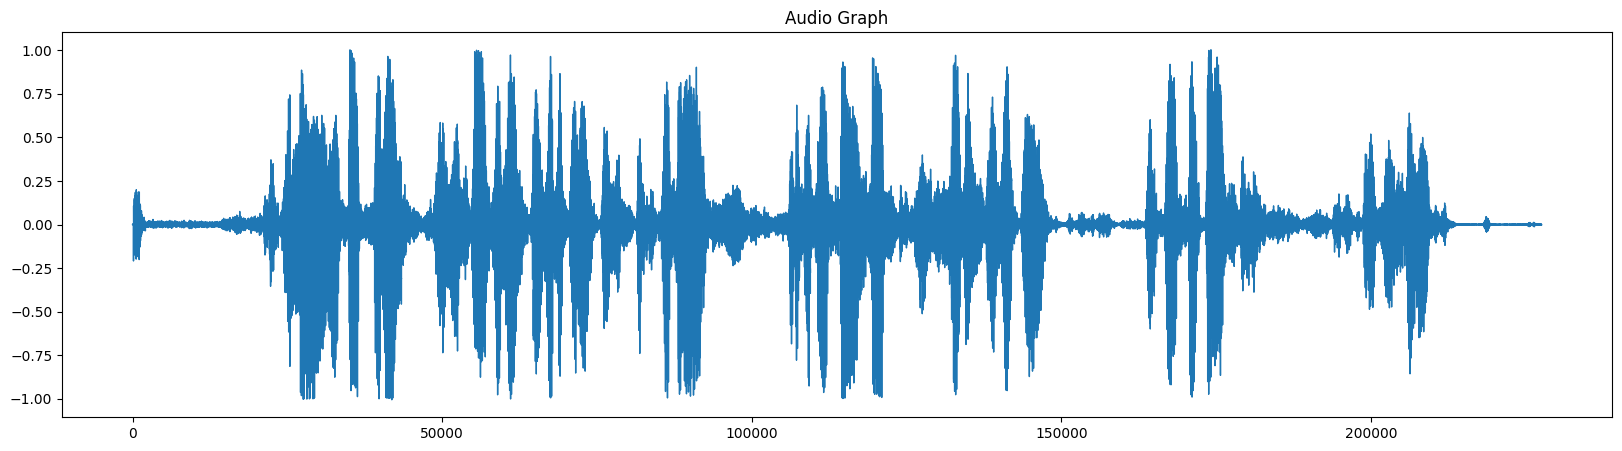

In [ ]:
pd.Series(y).plot(figsize=(20,5),lw=1,title="Audio Graph")
plt.show()

In [ ]:
S = librosa.feature.melspectrogram(y=y,sr = sr,n_mels=128)
S_to_db = librosa.amplitude_to_db(S,ref = np.max)
S_to_db

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)

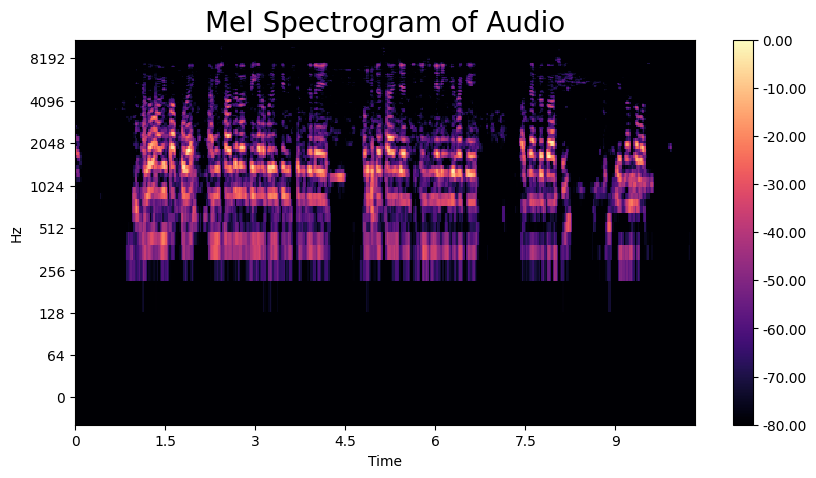

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_to_db,x_axis="time",y_axis="log",ax= ax)
ax.set_title("Mel Spectrogram of Audio",fontsize=20)
fig.colorbar(img,ax=ax,format=f"%0.02f")
plt.show()